<a href="https://colab.research.google.com/github/meghmodi2810/Machine-Learning-Projects/blob/main/LogisticRegressionSUV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [58]:
suv_data = pd.read_csv('sample_data/suv_data.csv')
print(suv_data.head(10))

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0
5  15728773    Male   27            58000          0
6  15598044  Female   27            84000          0
7  15694829  Female   32           150000          1
8  15600575    Male   25            33000          0
9  15727311  Female   35            65000          0


<Axes: xlabel='Purchased', ylabel='count'>

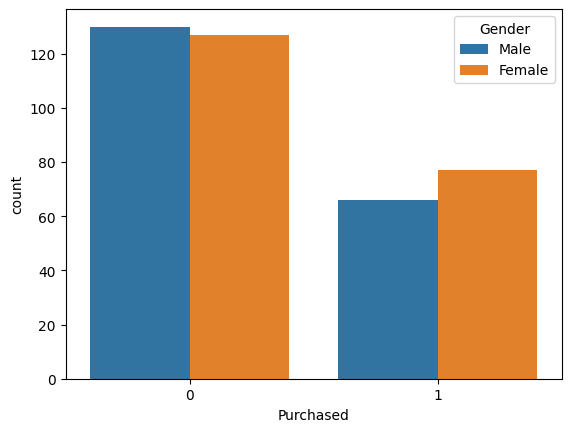

In [59]:
sns.countplot(x="Purchased", data=suv_data, hue="Gender")

**CHECK NULL VALUES**

<Axes: >

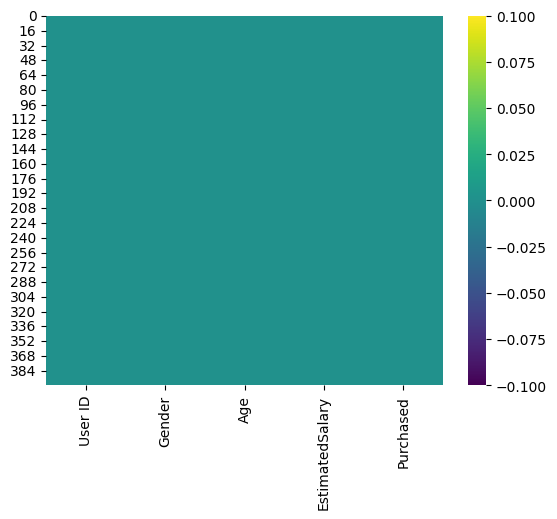

In [60]:
sns.heatmap(suv_data.isnull(), cmap="viridis")

In [61]:
suv_data.isnull().sum()

,0
User ID,0
Gender,0
Age,0
EstimatedSalary,0
Purchased,0


**REMOVE UNWANTED COLUMNS AND GET DUMMIES IF NEEDED**

In [62]:
suv_data.columns = suv_data.columns.map(str)

In [63]:
X = suv_data.drop(['User ID', 'Purchased'], axis=1)
y = suv_data['Purchased']

In [64]:
Sex = pd.get_dummies(X['Gender'], drop_first=True)
X.drop(['Gender'], axis=1, inplace=True)
X = pd.concat([X, Sex], axis=1)

**SPLITTING THE DATA INTO TEST AND TRAIN MODEL**

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [66]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [67]:
classifier = LogisticRegression(max_iter = 1000)
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [68]:
LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='deprecated', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)

LogisticRegression()

**FINAL PREDICTIONS**

In [69]:
predictions = classifier.predict(X_test)
classification_report(predictions, y_test)

'              precision    recall  f1-score   support\n\n           0       0.88      0.82      0.85        77\n           1       0.71      0.79      0.75        43\n\n    accuracy                           0.81       120\n   macro avg       0.79      0.80      0.80       120\nweighted avg       0.82      0.81      0.81       120\n'

In [70]:
confusion_matrix(predictions, y_test)

array([[63, 14],
       [ 9, 34]])

In [73]:
final_predictions = accuracy_score(y_test, predictions) * 100

In [75]:
print(f"The final prediction score = {final_predictions : .2f} %")

The final prediction score =  80.83 %
